<a href="https://colab.research.google.com/github/Ritika-rolyan/Resume/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset from online URL
titanic=pd.read_csv("https://huggingface.co/datasets/BrianSuToronto/titanic-dataset/resolve/main/titanic.csv")

In [ ]:
# Exploration
titanic.head(5) #top 5 data check

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info() # check Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
# checking missing values in dataset
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Data cleaning ,fill missing Age with meadian # here inplace=True mtlb original dataset m change hoga yeh
titanic['age'].fillna(titanic['age'].median(),inplace=True)


/tmp/ipython-input-147961312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(),inplace=True)


In [ ]:
titanic['age'].isnull().sum() # all null value fill by median here verified

np.int64(0)

In [ ]:
# now fill embarked with most common value
titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace=True)

/tmp/ipython-input-1493642201.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace=True)


In [ ]:
titanic.head(300)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,male,28.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
296,0,3,male,23.5,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
297,0,1,female,2.0,1,2,151.5500,S,First,child,False,C,Southampton,no,False
298,1,1,male,28.0,0,0,30.5000,S,First,man,True,C,Southampton,yes,True


In [ ]:
#drop deck column (because too many missing)
titanic.drop(columns=['deck'], axis =1,inplace=True)

In [ ]:
#verifying cleaning
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
# add new features familySize=sibsp+parch+1
titanic['familySize']=titanic['sibsp']+titanic['parch']+1

In [ ]:
#categories age into groups
titanic['Agegroup']=pd.cut(titanic['age'],bins=[0,18,65,100],labels=['child','adult','senior'])

/tmp/ipython-input-2649251621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived',data=titanic,palette='viridis')


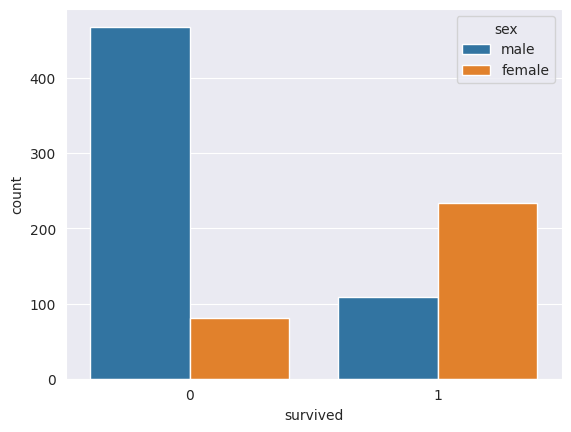

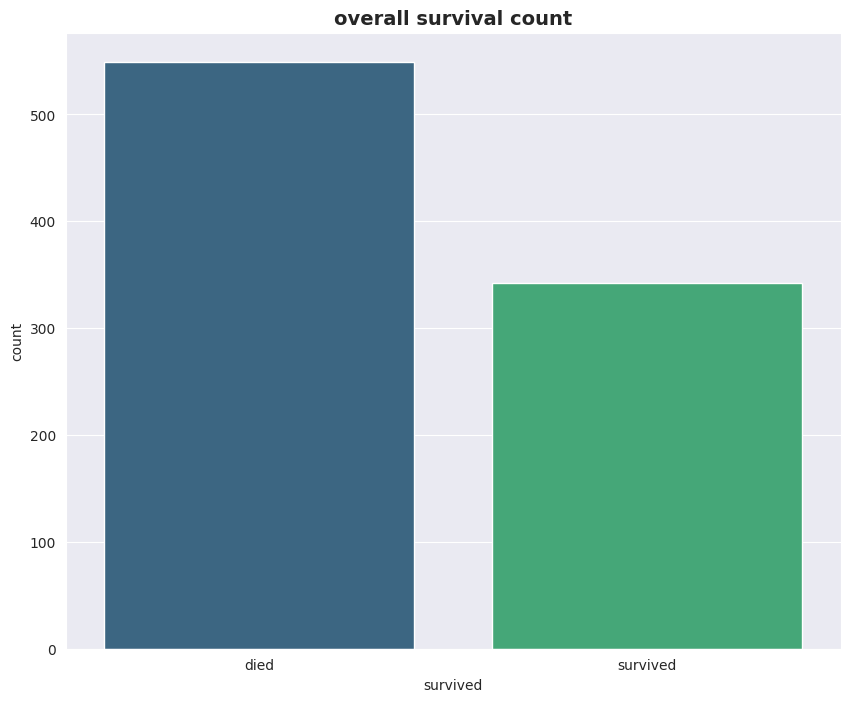

In [ ]:
# exploratary data analysis (Attractive Plots) survival count
sns.set_style('darkgrid')
sns.countplot(x='survived',hue='sex',data=titanic)
plt.figure(figsize=(10,8))
sns.countplot(x='survived',data=titanic,palette='viridis')
plt.title('overall survival count',fontsize=14,weight='bold')
plt.xticks([0, 1], ['died', 'survived'])
plt.show()

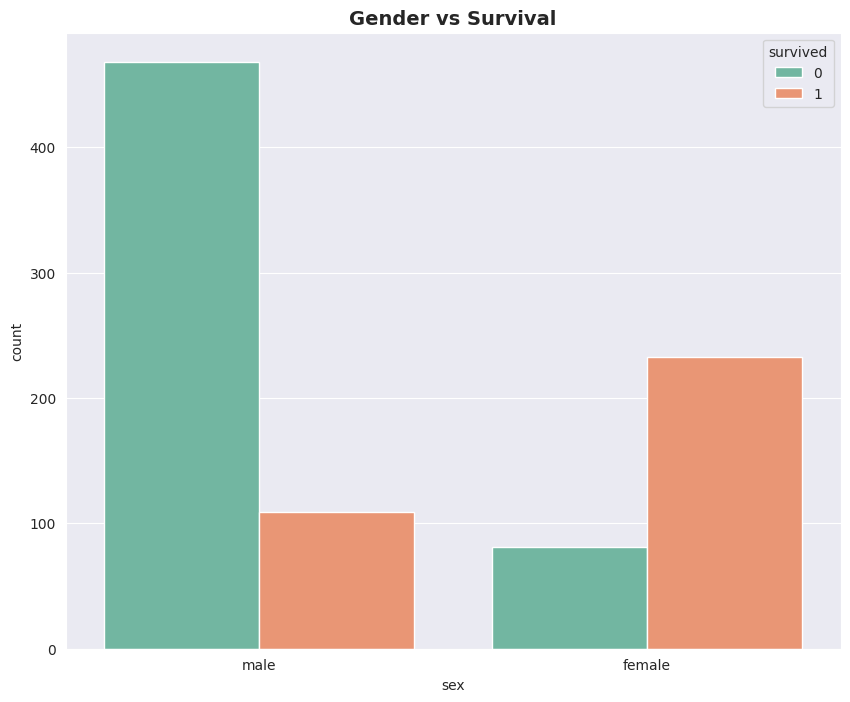

In [ ]:
# Gender vs Survival
plt.figure(figsize=(10,8))
sns.countplot(x='sex',hue='survived',data=titanic,palette='Set2')
plt.title('Gender vs Survival',fontsize=14,weight='bold')
plt.show()

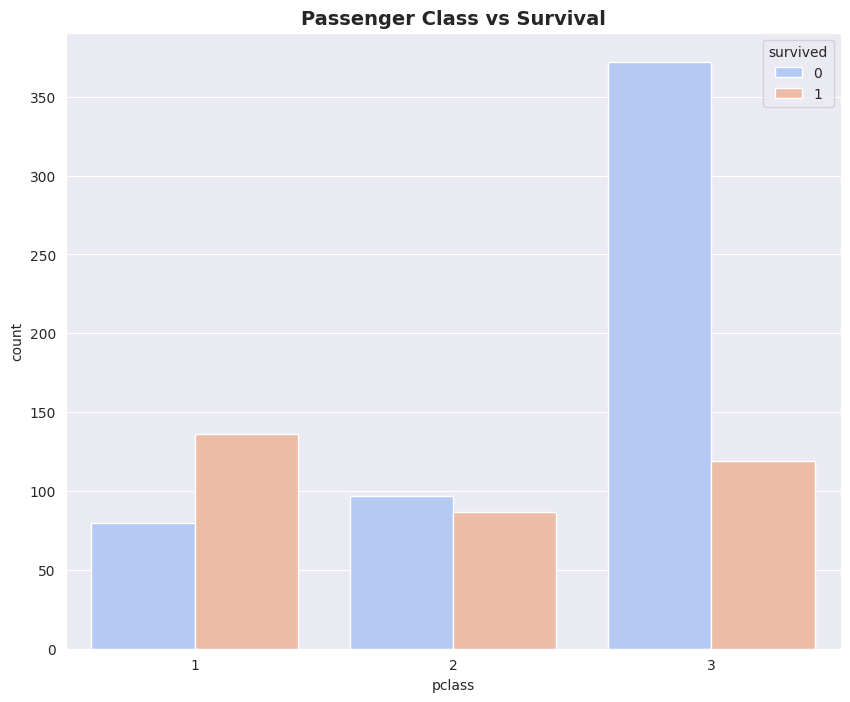

In [ ]:
# Passenger Class vs Survival
plt.figure(figsize=(10,8))
sns.countplot(x='pclass',hue='survived',data=titanic,palette='coolwarm')
plt.title('Passenger Class vs Survival',fontsize=14,weight='bold')
plt.show()


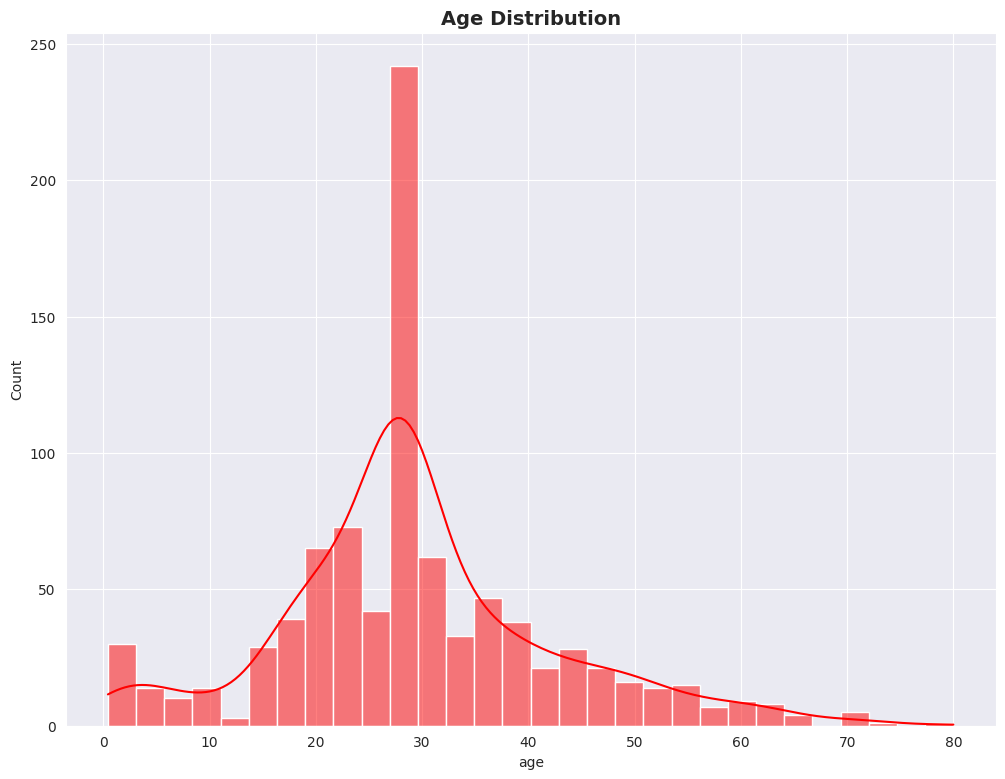

In [ ]:
#age distribution
plt.figure(figsize=(12,9))
sns.histplot(titanic['age'], bins=30,kde=True,color='red')
plt.title('Age Distribution',fontsize=14,weight='bold')
plt.show()

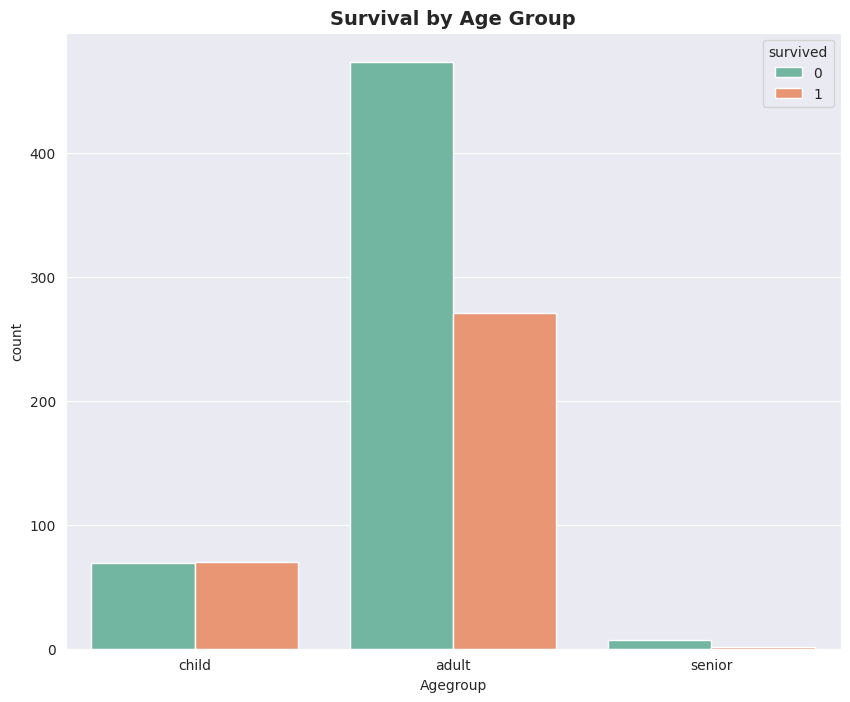

In [ ]:
# Survival by Age Group
plt.figure(figsize=(10,8))
sns.countplot(x='Agegroup',hue='survived',data=titanic,palette='Set2')
plt.title('Survival by Age Group',fontsize=14,weight='bold')
plt.show()
#

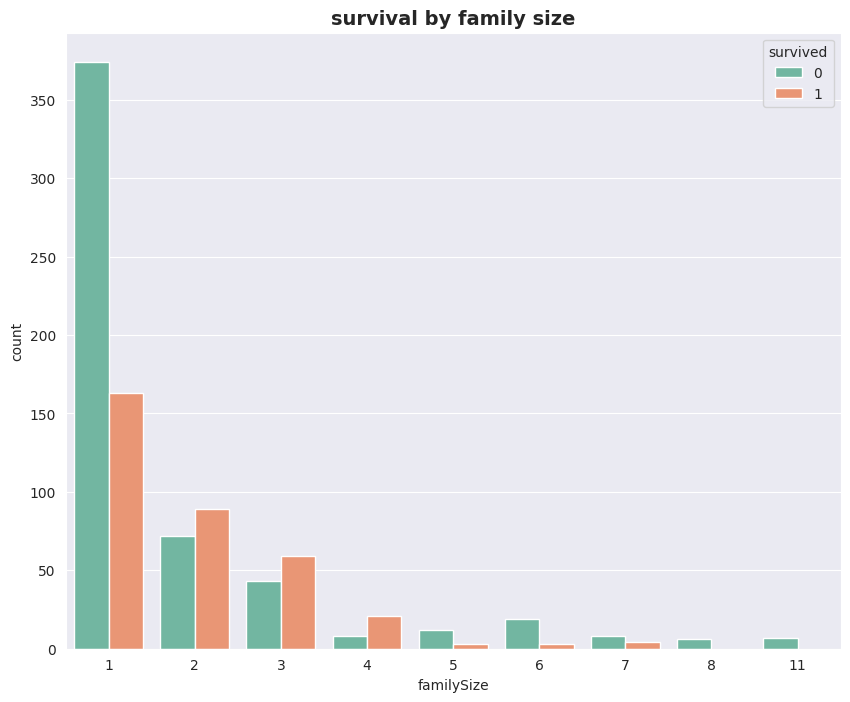

In [ ]:
# survival by family size
plt.figure(figsize=(10,8))
sns.countplot(x='familySize',hue='survived',data=titanic,palette='Set2')
plt.title('survival by family size',fontsize=14,weight='bold')
plt.show()

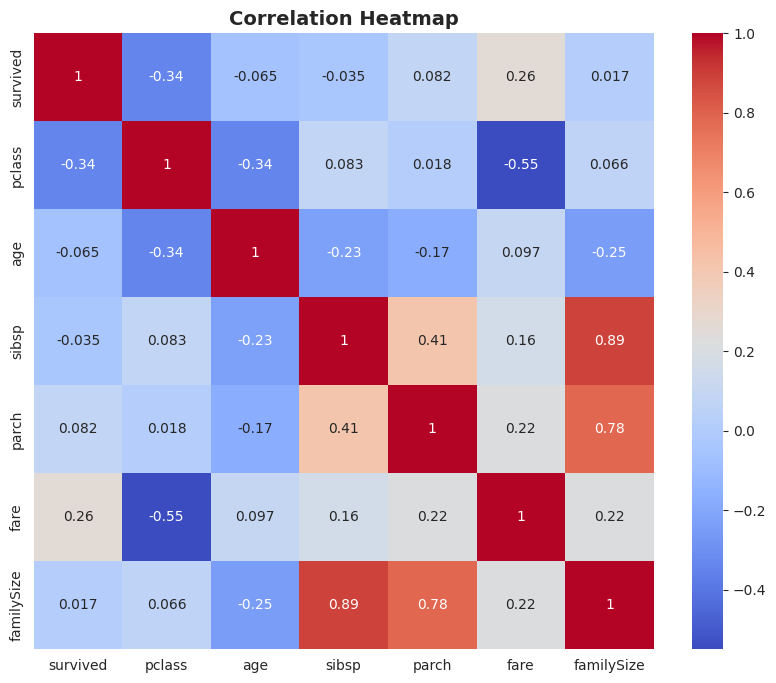

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
# Select only numeric columns for correlation calculation
numeric_titanic = titanic.select_dtypes(include=np.number)
sns.heatmap(numeric_titanic.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',fontsize=14,weight='bold')
plt.show()

**key insights**
1.Women survived more than men.
2.First class passengers had the highest survival rates.
3.Children had higher survival chances compared to adults.
4. Larger families had lower survival chances ,medium families survived more.
5.Fare has positive corerealation with survival (rich passengers survived mor).